In [ ]:
!pip install markupsafe==2.0.1 Jinja2

In [3]:
# Import libraries
import pandas as pd
import kaggle
from pycaret.classification import *

In [4]:
data = "../data/"

In [5]:
# download Gym Membership Churn Prediction dataset from kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('ellanihill/model-fitness-customer-churn', path=data, unzip=True)

In [6]:
# read the data
df = pd.read_csv(data + 'gym_churn_us.csv')
# view the data
df.head(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


In [9]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"\nValue Counts for {column}:\n{value_counts}")


Value Counts for gender:
1    2041
0    1959
Name: gender, dtype: int64

Value Counts for Near_Location:
1    3381
0     619
Name: Near_Location, dtype: int64

Value Counts for Partner:
0    2053
1    1947
Name: Partner, dtype: int64

Value Counts for Promo_friends:
0    2766
1    1234
Name: Promo_friends, dtype: int64

Value Counts for Phone:
1    3614
0     386
Name: Phone, dtype: int64

Value Counts for Contract_period:
1     2207
12     960
6      833
Name: Contract_period, dtype: int64

Value Counts for Group_visits:
0    2351
1    1649
Name: Group_visits, dtype: int64

Value Counts for Age:
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64

Value Counts for Avg_additional_charges_total:
14.227470     1
17.082321     1
278.204461    1
120.457631    1
130.711299    1
             

In [10]:
# view datatypes
df.dtypes

gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

In [11]:
# get the spread of the target variable
df['Churn'].value_counts(normalize=True)

0    0.73475
1    0.26525
Name: Churn, dtype: float64

In [12]:
# Manaul Preprocessing
# Assign target to variable
target = 'Churn'
# identify columns to ignore
ignored = ''

# Identify categorical features
cat_features = [col for col in df.columns 
                if col != target 
                and col != ignored 
                and not pd.api.types.is_numeric_dtype(df[col])
                or (col != target and pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() < 13)
                ]

numeric_features = [col for col in df.columns
                   if col not in target and col not in ignored and col not in cat_features]

# view categorical features
cat_features

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Month_to_end_contract']

In [13]:
numeric_features

['Age',
 'Avg_additional_charges_total',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month']

In [14]:
experiment = setup(data=df, target= target, categorical_features=cat_features,
                    numeric_features = numeric_features,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(4000, 14)"
4,Transformed data shape,"(4000, 27)"
5,Transformed train set shape,"(2800, 27)"
6,Transformed test set shape,"(1200, 27)"
7,Ordinal features,6
8,Numeric features,5
9,Categorical features,8


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9350,0.9779,0.8533,0.8992,0.8748,0.8309,0.8322,0.3200
gbc,Gradient Boosting Classifier,0.9293,0.9772,0.8275,0.8998,0.8611,0.8138,0.8160,0.2930
lightgbm,Light Gradient Boosting Machine,0.9271,0.9770,0.8304,0.8907,0.8581,0.8092,0.8113,0.3040
ridge,Ridge Classifier,0.9236,0.0000,0.7548,0.9474,0.8383,0.7894,0.7994,0.0760
lr,Logistic Regression,0.9232,0.9734,0.8343,0.8731,0.8521,0.8003,0.8017,0.8150
lda,Linear Discriminant Analysis,0.9232,0.9543,0.7643,0.9362,0.8398,0.7902,0.7984,0.0650
ada,Ada Boost Classifier,0.9221,0.9675,0.8424,0.8648,0.8519,0.7992,0.8006,0.1860
rf,Random Forest Classifier,0.9100,0.9668,0.7967,0.8592,0.8244,0.7642,0.7670,0.2910
et,Extra Trees Classifier,0.9011,0.9541,0.7657,0.8492,0.8043,0.7384,0.7409,0.2250
dt,Decision Tree Classifier,0.8864,0.8561,0.7914,0.7879,0.7882,0.7108,0.7120,0.0790


In [16]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
get_config('X_train_transformed').head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period_1.0,Contract_period_12.0,Contract_period_6.0,Group_visits,Age,...,Month_to_end_contract_11.0,Month_to_end_contract_8.0,Month_to_end_contract_5.0,Month_to_end_contract_7.0,Month_to_end_contract_4.0,Month_to_end_contract_3.0,Month_to_end_contract_2.0,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
286,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.705005,0.701147
3945,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.162560,1.001496


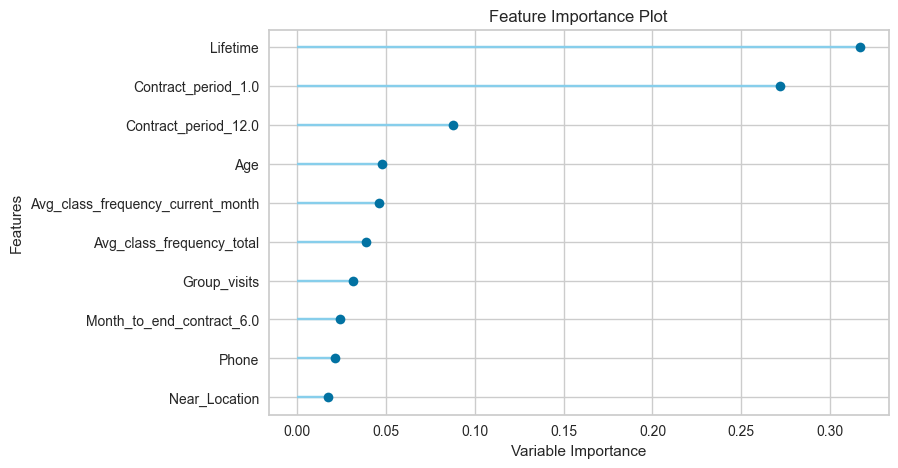

In [18]:
# plot feature importance
plot_model(best_model, plot = 'feature')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9550,0.9768,0.8899,0.9371,0.9129,0.8826,0.8831


,Samples,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC,Selection Rate
gender,,,,,,,,,
0,570,0.945614,0.917347,0.851852,0.951724,0.899023,0.861964,0.864444,0.254386
1,630,0.963492,0.952085,0.929487,0.923567,0.926518,0.902231,0.902239,0.249206


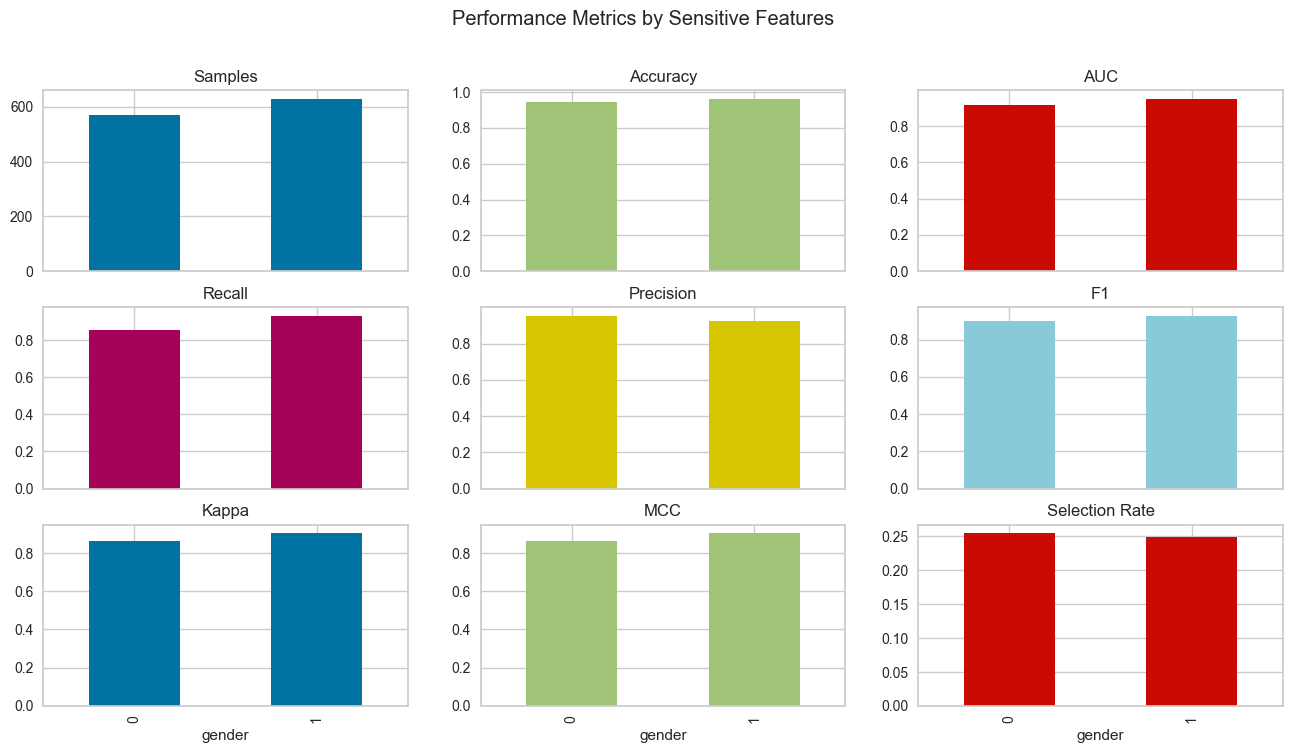

In [19]:
# check fairness
check_fairness(best_model, sensitive_features = ['gender'])

In [20]:
# save model
save_model(best_model, 'my_gym_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age',
                                              'Avg_additional_charges_total',
                                              'Lifetime',
                                              'Avg_class_frequency_total',
                                              'Avg_class_frequency_current_month'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mea...
                               